In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

df = pd.read_csv('Tasmania_Data.csv')
df1 = pd.read_csv('Sydney_Data.csv')
df2 = pd.read_csv('Perth_Data.csv')
df3 = pd.read_csv('Adelaide_Data.csv')
#df.describe()
#df1.describe()
#df2.describe()
#df3.describe()





In [ ]:

df.head()
def remove_outliers(df, threshold=3):

    z_scores = stats.zscore(df.iloc[:])


    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    outliers_count_per_column = outliers_mask.sum(axis=0)
    total_outliers = outliers_count_per_column.sum()
    are_outliers_irrelevant = total_outliers / df.size
    df_without_outliers = df[~outliers_mask.any(axis=1)]
    # print("Liczba outlierów w każdej kolumnie:")
    # print(outliers_count_per_column)
    print("\nŁączna liczba outlierów:", total_outliers)
    print("\nCzy outliery są istotne?:", are_outliers_irrelevant)

    return df_without_outliers

df =  remove_outliers(df)




Łączna liczba outlierów: 1219

Czy outliery są istotne?: 0.0003455263409270707


<Axes: >

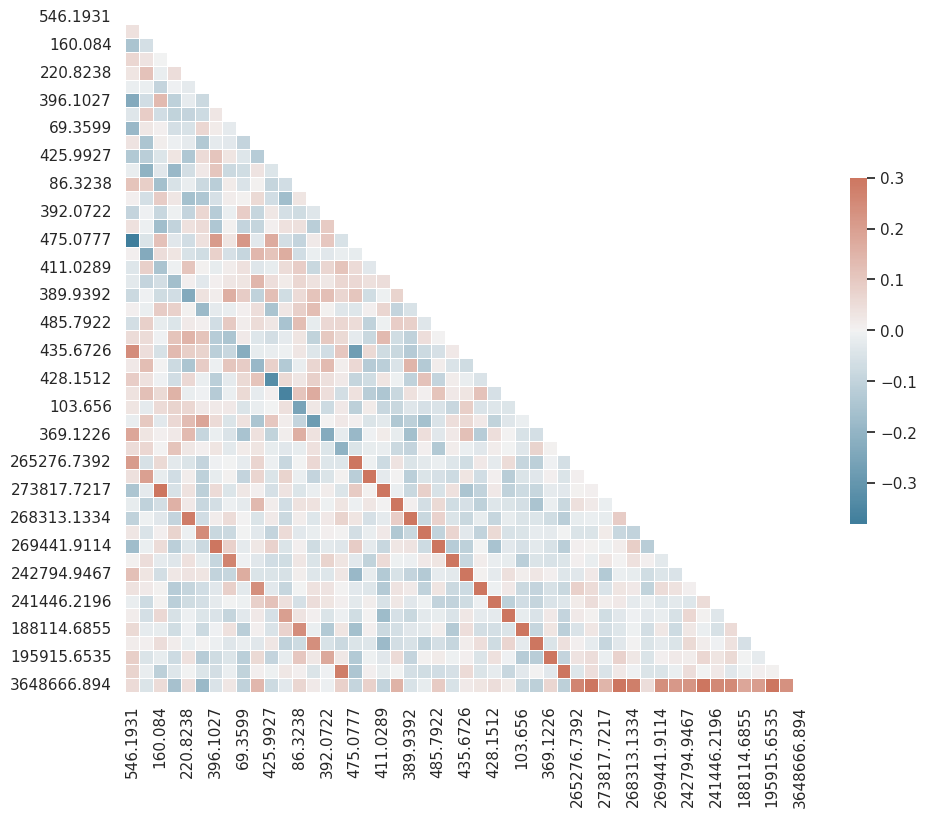

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
corr = df.corr(numeric_only=False)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Removing outliers, showing correlation matrix, removing strongly
correlated features and data leaks, data normalisation (also taking care of long tail/asymmetric
feature distributions when necessary).

In [ ]:
#Reparing indexes of dataframe and adding them as a new row
df_temp = df.copy()
df_temp = df_temp.drop(df_temp.index[-1])
#print(df_temp.columns.tolist())
new_index = df.index[-1] + 1
df.loc[new_index] = df_temp.columns.tolist()
#print(df.loc[new_index])
#print(df_temp)

#changing labels name to x[pozition_number],y[pozition_number],p[pozition_number] and target
def change_labels(df):
  new_row= df.columns.tolist()
  x_columns = [f'X_{i}' for i in range(1, 17)]
  y_columns = [f'Y_{i}' for i in range(1, 17)]
  p_columns = [f'P_{i}' for i in range(1, 17)]
  target_column = 'Target'


  df.columns = x_columns + y_columns + p_columns + [target_column]
  df = df.append(new_row, ignore_index=True)


change_labels(df)

#print(df.head())
#change_labels(df_temp)
#print(df_temp)





<ipython-input-56-e36581c4fe0a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In [ ]:


#Normalization of all values
#normalization of x values
def data_normalization(df):
    df_temp8 = df.copy()
    df_temp8 = df_temp8.drop(df_temp8.index[-1])

    # Replace column labels to new records of the dataframe
    df_temp_x = df_temp8.iloc[:, 0:16]
    max_value_x = df_temp_x.values.max()
    print("Max value",max_value_x)
    df_temp_x = df_temp_x.div(max_value_x)

    df_temp_y = df_temp8.iloc[:, 16:32]
    max_value_y = df_temp_y.values.max()
    print("Max value",max_value_y)
    df_temp_y = df_temp_y.div(max_value_y)

    df_temp8.iloc[:, 0:16] = df_temp_x
    df_temp8.iloc[:, 16:32] = df_temp_y

    df_temp_xiyi = df_temp8.iloc[:, 32:49]
    max_value_xiyi = df_temp_xiyi.values.max()
    print("Max value",max_value_xiyi)
    df_temp_xiyi = df_temp_xiyi.div(max_value_xiyi)
    df_temp8.iloc[:, 32:49] = df_temp_xiyi

    return df_temp8

def data_normalization1(df):
    df_temp8 = df.copy()
    df_temp8 = df_temp8.drop(df_temp8.index[-1])

    # Replace column labels to new records of the dataframe
    df_temp_x = df_temp8.iloc[:, 0:16]
    max_value_x = df_temp_x.values.max()
    print("Max value",max_value_x)
    df_temp_x = df_temp_x.div(max_value_x)

    df_temp_y = df_temp8.iloc[:, 16:32]
    max_value_y = df_temp_y.values.max()
    print("Max value",max_value_y)
    df_temp_y = df_temp_y.div(max_value_y)

    df_temp8.iloc[:, 0:16] = df_temp_x
    df_temp8.iloc[:, 16:32] = df_temp_y

    df_temp_xiyi = df_temp8.iloc[:, 32:49]
    max_value_xiyi = df_temp_xiyi.values.max()
    print("Max value",max_value_xiyi)
    df_temp_xiyi = df_temp_xiyi.div(max_value_xiyi)
    df_temp8.iloc[:, 32:49] = df_temp_xiyi

    return df_temp8









In [ ]:
df_check = df.copy()
sum_column = df_check.iloc[:, 32:48].sum(axis=1)
new_column_dtype = df_check.iloc[:, 32].dtype
df_check['sum_from_32_to_48'] = sum_column.astype(new_column_dtype)
margin_of_error = 0.01
print("suma właściwa",df_check.iloc[:,48:49])
print("suma właściwa",df_check.iloc[:,49:50])

suma właściwa             Target
0      3810742.386
1      3745925.666
2      3781329.415
3      3667609.449
4      3751960.252
...            ...
71995  3645856.545
71996  3718330.844
71997  3685475.541
71998  3733281.103
71999  3648666.894

[70892 rows x 1 columns]
suma właściwa                                        sum_from_32_to_48
0                                           3810742.3856
1                                           3745925.6663
2                                           3781329.4153
3                                           3667609.4493
4                                           3751960.2522
...                                                  ...
71995                                       3645856.5448
71996                                       3718330.8435
71997                                       3685475.5416
71998                                       3733281.1031
71999  265276.7392175454.6032273817.7217224009.135826...

[70892 rows x 1 columns]


In [ ]:
#Linear Regresion for every sample
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15
# predictions=[]

# # Splitting into 70% train and 30% remaining (validation + test)
# train_df, remaining_df = train_test_split(df, test_size=(1 - train_ratio), random_state=42)

# # Splitting the remaining 30% into 50% validation and 50% test
# relative_test_size = test_ratio / (val_ratio + test_ratio)
# val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)

# # Features for training and target variable for training
# for i in range(16):
#     X_train = train_df.iloc[:,[0+i, 16+i]]  # Two input features 'A' and 'B'
#     y_train = train_df.iloc[:,[ 32+i]] # Target variable 'C'

#   # Initialize and train the Linear Regression model
#     linear_reg = LinearRegression()
#     linear_reg.fit(X_train, y_train)


#     X_val = val_df.iloc[:,[0+i, 16+i]]  # Features for validation
#     y_val = val_df.iloc[:,[ 32+i]]  # Target variable for validation

#     # Predicting on validation set
#     y_pred = linear_reg.predict(X_val)


#     random_indices = np.random.choice(len(y_val), size=500, replace=False)

#     # Scatter plot between actual and predicted values for the random 100 values
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue')
#     plt.xlabel('Actual values')
#     plt.ylabel('Predicted values')
#     plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
#     plt.grid(True)
#     plt.show()


#     mse = mean_squared_error(y_val, y_pred)
#     r_squared = r2_score(y_val, y_pred)

#     print(f"Mean Squared Error (MSE): {mse}")
#     print(f"R-squared: {r_squared}")


In [ ]:
#XG boost for evry sample

#Linear Regresion for every sample
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15
# predictions=[]

# # Splitting into 70% train and 30% remaining (validation + test)
# train_df, remaining_df = train_test_split(df_temp, test_size=(1 - train_ratio), random_state=42)

# # Splitting the remaining 30% into 50% validation and 50% test
# relative_test_size = test_ratio / (val_ratio + test_ratio)
# val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)

# # Features for training and target variable for training
# for i in range(16):
#     X_train = train_df.iloc[:,[0+i, 16+i]]  # Two input features 'A' and 'B'
#     y_train = train_df.iloc[:,[ 32+i]] # Target variable 'C'

#   # Initialize and train the Linear Regression model
#     linear_reg = xgb_reg = XGBRegressor(n_estimators=100, random_state=42)  # Można dostosować ilość drzew (n_estimators) i inne parametry
#     linear_reg.fit(X_train, y_train)


#     X_val = val_df.iloc[:,[0+i, 16+i]]  # Features for validation
#     y_val = val_df.iloc[:,[ 32+i]]  # Target variable for validation

#     # Predicting on validation set
#     y_pred = linear_reg.predict(X_val)


#     random_indices = np.random.choice(len(y_val), size=500, replace=False)

#     # Scatter plot between actual and predicted values for the random 100 values
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue')
#     plt.xlabel('Actual values')
#     plt.ylabel('Predicted values')
#     plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
#     plt.grid(True)
#     plt.show()


#     mse = mean_squared_error(y_val, y_pred)
#     r_squared = r2_score(y_val, y_pred)

#     print(f"Mean Squared Error (MSE): {mse}")
#     print(f"R-squared: {r_squared}")

In [ ]:
def LinearRegresionModel(df):

  train_ratio = 0.7
  val_ratio = 0.15
  test_ratio = 0.15

  #Splitting into 70% train and 30% remaining (validation + test)
  train_df, remaining_df = train_test_split(df, test_size=(1 - train_ratio), random_state=42)

  #Splitting the remaining 30% into 50% validation and 50% test
  relative_test_size = test_ratio / (val_ratio + test_ratio)
  val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)


  X_train_set1 = train_df.iloc[:, 0:16]  # Columns 0 to 15
  X_train_set2 = train_df.iloc[:, 16:32]  # Columns 16 to 31
  X_train = pd.concat([X_train_set1, X_train_set2], axis=1)

  y_train = train_df.iloc[:,[ 48]] # Target variable 'C'

  #Initialize and train the Linear Regression model
  linear_reg = LinearRegression()
  linear_reg.fit(X_train, y_train)


  X_val1 = val_df.iloc[:, 0:16]  # Columns 0 to 15
  X_val2 = val_df.iloc[:, 16:32]  # Columns 16 to 31
  X_val = pd.concat([X_val1, X_val2], axis=1)


  y_val = val_df.iloc[:,[ 48]]  # Target variable for validation

  #Predicting on validation set
  y_pred = linear_reg.predict(X_val)


  random_indices = np.random.choice(len(y_val), size=500, replace=False)

  #Scatter plot between actual and predicted values for the random 100 values
  plt.figure(figsize=(8, 6))
  plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
  plt.grid(True)
  plt.show()
  from sklearn.metrics import mean_squared_error, r2_score


  mse = mean_squared_error(y_val, y_pred)
  r_squared = r2_score(y_val, y_pred)

  print(f"Mean Squared Error (MSE): {mse}")
  print(f"R-squared: {r_squared}")

In [ ]:
def LassoModel(df):


  train_ratio = 0.7
  val_ratio = 0.15
  test_ratio = 0.15

  #Splitting into 70% train and 30% remaining (validation + test)
  train_df, remaining_df = train_test_split(df, test_size=(1 - train_ratio), random_state=42)

  #Splitting the remaining 30% into 50% validation and 50% test
  relative_test_size = test_ratio / (val_ratio + test_ratio)
  val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)


  X_train_set1 = train_df.iloc[:, 0:16]  # Columns 0 to 15
  X_train_set2 = train_df.iloc[:, 16:32]  # Columns 16 to 31
  X_train = pd.concat([X_train_set1, X_train_set2], axis=1)

  y_train = train_df.iloc[:,[ 48]] # Target variable 'C'

  #Initialize and train the Linear Regression model
  linear_reg = Lasso()
  linear_reg.fit(X_train, y_train)


  X_val1 = val_df.iloc[:, 0:16]  # Columns 0 to 15
  X_val2 = val_df.iloc[:, 16:32]  # Columns 16 to 31
  X_val = pd.concat([X_val1, X_val2], axis=1)


  y_val = val_df.iloc[:,[ 48]]  # Target variable for validation

  #Predicting on validation set
  y_pred = linear_reg.predict(X_val)


  random_indices = np.random.choice(len(y_val), size=500, replace=False)

  #Scatter plot between actual and predicted values for the random 100 values
  plt.figure(figsize=(8, 6))
  plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue')
  plt.xlabel('Actual values')
  plt.ylabel('Predicted values')
  plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
  plt.grid(True)
  plt.show()
  from sklearn.metrics import mean_squared_error, r2_score


  mse = mean_squared_error(y_val, y_pred)
  r_squared = r2_score(y_val, y_pred)

  print(f"Mean Squared Error (MSE): {mse}")
  print(f"R-squared: {r_squared}")

In [ ]:
def RidgeModel(df):
    train_ratio = 0.7
    val_ratio = 0.15
    test_ratio = 0.15

    #Splitting into 70% train and 30% remaining (validation + test)
    train_df, remaining_df = train_test_split(df, test_size=(1 - train_ratio), random_state=42)

    #Splitting the remaining 30% into 50% validation and 50% test
    relative_test_size = test_ratio / (val_ratio + test_ratio)
    val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)


    X_train_set1 = train_df.iloc[:, 0:16]  # Columns 0 to 15
    X_train_set2 = train_df.iloc[:, 16:32]  # Columns 16 to 31
    X_train = pd.concat([X_train_set1, X_train_set2], axis=1)

    y_train = train_df.iloc[:,[ 48]] # Target variable 'C'

    #Initialize and train the Linear Regression model
    linear_reg = Ridge()
    linear_reg.fit(X_train, y_train)


    X_val1 = val_df.iloc[:, 0:16]  # Columns 0 to 15
    X_val2 = val_df.iloc[:, 16:32]  # Columns 16 to 31
    X_val = pd.concat([X_val1, X_val2], axis=1)


    y_val = val_df.iloc[:,[ 48]]  # Target variable for validation

    #Predicting on validation set
    y_pred = linear_reg.predict(X_val)


    random_indices = np.random.choice(len(y_val), size=500, replace=False)

    #Scatter plot between actual and predicted values for the random 100 values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
    plt.grid(True)
    plt.show()
    from sklearn.metrics import mean_squared_error, r2_score


    mse = mean_squared_error(y_val, y_pred)
    r_squared = r2_score(y_val, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r_squared}")

In [ ]:
def RandomForestModel(df):
    #RandomForest
    train_ratio = 0.7
    val_ratio = 0.15
    test_ratio = 0.15

    #Splitting into 70% train and 30% remaining (validation + test)
    train_df, remaining_df = train_test_split(df, test_size=(1 - train_ratio), random_state=42)

    #Splitting the remaining 30% into 50% validation and 50% test
    relative_test_size = test_ratio / (val_ratio + test_ratio)
    val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)


    X_train_set1 = train_df.iloc[:, 0:16]  # Columns 0 to 15
    X_train_set2 = train_df.iloc[:, 16:32]  # Columns 16 to 31
    X_train = pd.concat([X_train_set1, X_train_set2], axis=1)

    y_train = train_df.iloc[:,[ 48]] # Target variable 'C'

    #Initialize and train the Linear Regression model
    linear_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    linear_reg.fit(X_train, y_train)


    X_val1 = val_df.iloc[:, 0:16]  # Columns 0 to 15
    X_val2 = val_df.iloc[:, 16:32]  # Columns 16 to 31
    X_val = pd.concat([X_val1, X_val2], axis=1)


    y_val = val_df.iloc[:,[ 48]]  # Target variable for validation

    #Predicting on validation set
    y_pred = linear_reg.predict(X_val)


    random_indices = np.random.choice(len(y_val), size=500, replace=False)

    #Scatter plot between actual and predicted values for the random 100 values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
    plt.grid(True)
    plt.show()
    from sklearn.metrics import mean_squared_error, r2_score


    mse = mean_squared_error(y_val, y_pred)
    r_squared = r2_score(y_val, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r_squared}")

In [ ]:
# Splitting into 70% training and  30% remaining (validation + test)
def XGBoost(df_temp):
    train_ratio = 0.7
    val_ratio = 0.15
    test_ratio = 0.15


    train_df, remaining_df = train_test_split(df_temp, test_size=(1 - train_ratio), random_state=42)

    # Splitting the remaining 30% into 50% validation and 50% test
    relative_test_size = test_ratio / (val_ratio + test_ratio)
    val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)

    X_train_set1 = train_df.iloc[:, 0:16]  # Columns 0 to 15
    X_train_set2 = train_df.iloc[:, 16:32]  # Columns 16 to 31
    X_train = pd.concat([X_train_set1, X_train_set2], axis=1)

    y_train = train_df.iloc[:, [48]]  # Target variable


    xgb_reg = XGBRegressor(
        learning_rate=0.2,
        n_estimators=200,
        max_depth=7,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=1.0,
        reg_alpha=0,
        reg_lambda=1,
        n_jobs=-1,
        random_state=42
     )

    xgb_reg.fit(X_train, y_train)

    X_val1 = val_df.iloc[:, 0:16]  # Columns 0 to 15
    X_val2 = val_df.iloc[:, 16:32]  # Columns 16 to 31
    X_val = pd.concat([X_val1, X_val2], axis=1)

    y_val = val_df.iloc[:, [48]]  # Target variable for validation

    # Predicting on validation set
    y_pred = xgb_reg.predict(X_val)

    random_indices = np.random.choice(len(y_val), size=5000, replace=False)

    # Scatter plot between actual and predicted values for the random 100 values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue',s=5)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
    plt.grid(True)
    plt.show()

    # Calculating model metrics
    mse = mean_squared_error(y_val, y_pred)
    r_squared = r2_score(y_val, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r_squared}")


In [ ]:
def XGBoostChamp(df_temp):
    train_ratio = 0.7
    val_ratio = 0.15
    test_ratio = 0.15


    train_df, remaining_df = train_test_split(df_temp, test_size=(1 - train_ratio), random_state=42)

    # Splitting the remaining 30% into 50% validation and 50% test
    relative_test_size = test_ratio / (val_ratio + test_ratio)
    val_df, test_df = train_test_split(remaining_df, test_size=relative_test_size, random_state=42)

    X_train_set1 = train_df.iloc[:, 0:16]  # Columns 0 to 15
    X_train_set2 = train_df.iloc[:, 16:32]  # Columns 16 to 31
    X_train = pd.concat([X_train_set1, X_train_set2], axis=1)

    y_train = train_df.iloc[:, [48]]  # Target variable


    xgb_reg = XGBRegressor(
        learning_rate=0.2,
        n_estimators=200,
        max_depth=7,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=1.0,
        reg_alpha=0,
        reg_lambda=1,
        n_jobs=-1,
        random_state=42
     )

    xgb_reg.fit(X_train, y_train)

    X_val1 = test_df.iloc[:, 0:16]  # Columns 0 to 15
    X_val2 = test_df.iloc[:, 16:32]  # Columns 16 to 31
    X_val = pd.concat([X_val1, X_val2], axis=1)

    y_val = test_df.iloc[:, [48]]  # Target variable for validation

    # Predicting on validation set
    y_pred = xgb_reg.predict(X_val)

    random_indices = np.random.choice(len(y_val), size=5000, replace=False)

    # Scatter plot between actual and predicted values for the random 100 values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val.iloc[random_indices], y_pred[random_indices], color='blue',s=5)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Scatter plot of Actual vs Predicted values (Random 500 samples)')
    plt.grid(True)
    plt.show()

    # Calculating model metrics
    mse = mean_squared_error(y_val, y_pred)
    r_squared = r2_score(y_val, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r_squared}")
    return mse


Łączna liczba outlierów: 862

Czy outliery są istotne?: 0.00024433445929379405

Łączna liczba outlierów: 1636

Czy outliery są istotne?: 0.00046372526149030983

Łączna liczba outlierów: 1589

Czy outliery są istotne?: 0.00045040933676729117


<ipython-input-56-e36581c4fe0a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-56-e36581c4fe0a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-56-e36581c4fe0a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Max value 566.0
Max value 566.0
Max value 4096276.74
Max value 1.0
Max value 1.0
Max value 1.0
Max value 566.0
Max value 566.0008
Max value 1536347.157
Max value 566.0
Max value 566.0008
Max value 1536347.157
Max value 566.0
Max value 566.0
Max value 1550896.924
Max value 566.0
Max value 566.0
Max value 1550896.924
Max value 566.0
Max value 566.0
Max value 1573785.736
Max value 566.0
Max value 566.0
Max value 1573785.736


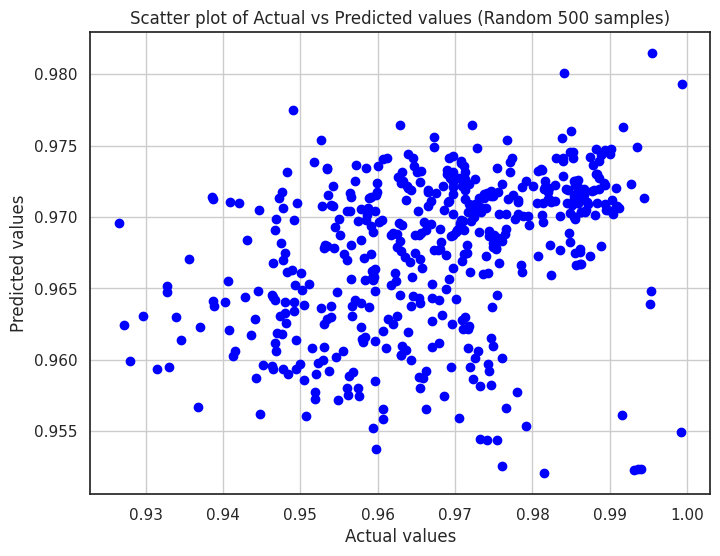

Mean Squared Error (MSE): 0.00018107264881255926
R-squared: 0.13528898360527197


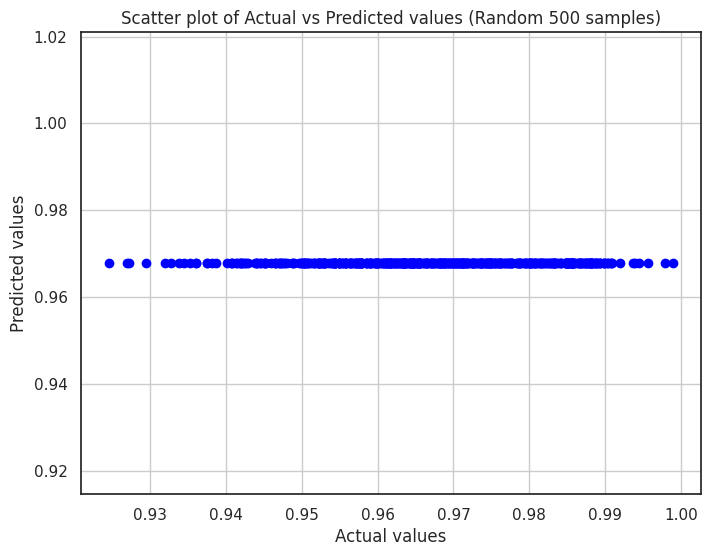

Mean Squared Error (MSE): 0.00020940258218346252
R-squared: -3.913511159581162e-07


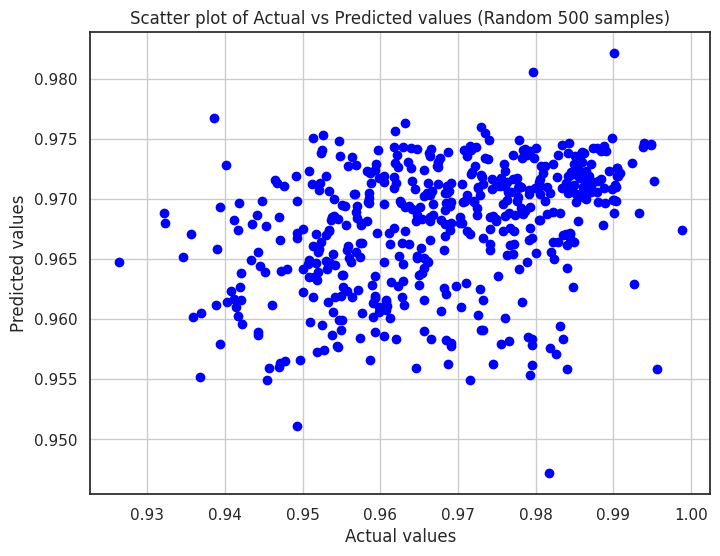

Mean Squared Error (MSE): 0.00018107269549468133
R-squared: 0.1352887606751637


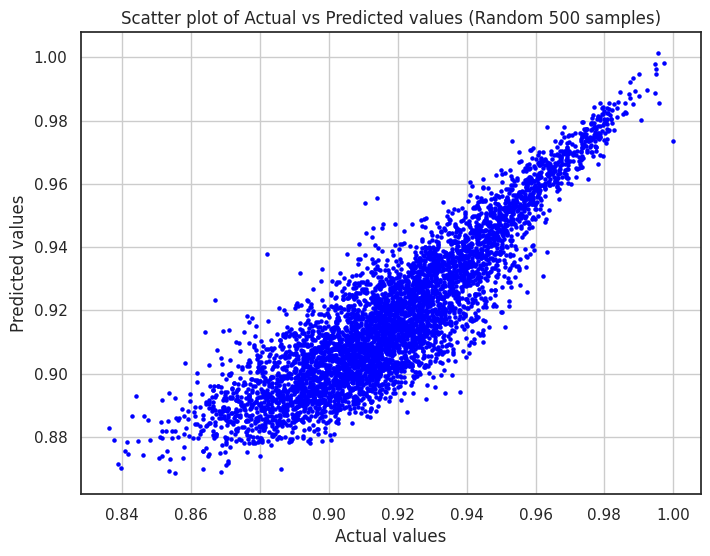

Mean Squared Error (MSE): 0.00014923673116277902
R-squared: 0.7849741786646681


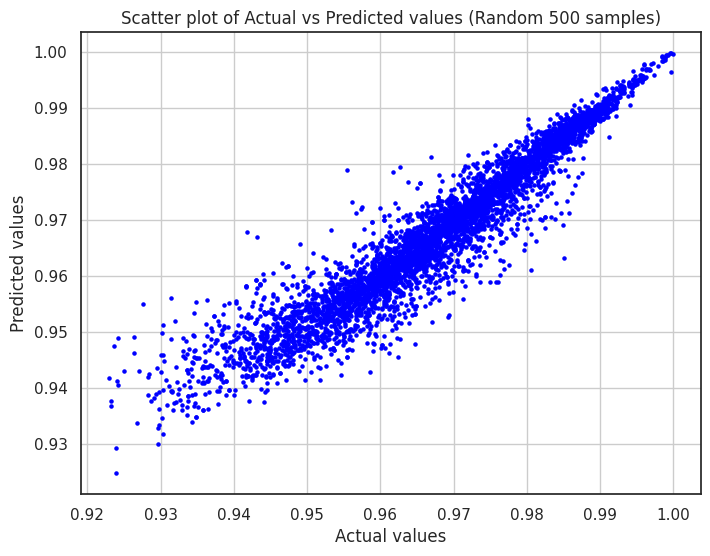

Mean Squared Error (MSE): 1.9817427782837145e-05
R-squared: 0.9063571117035396


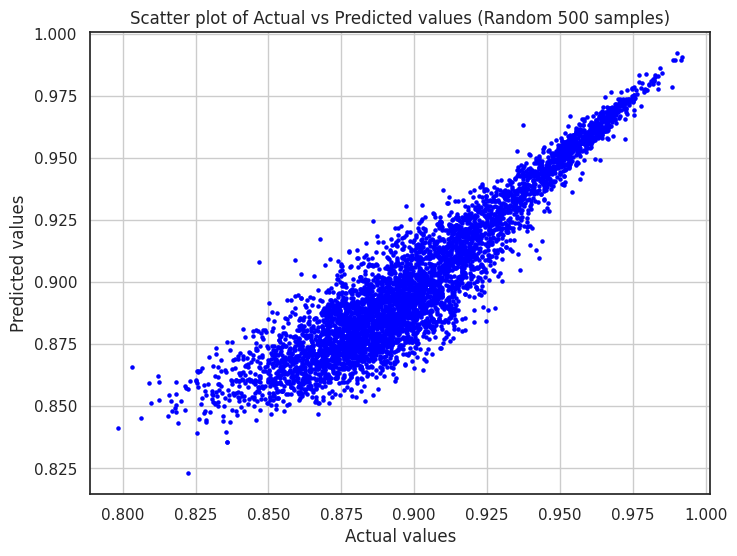

Mean Squared Error (MSE): 0.00015092797731569078
R-squared: 0.8592595015812658


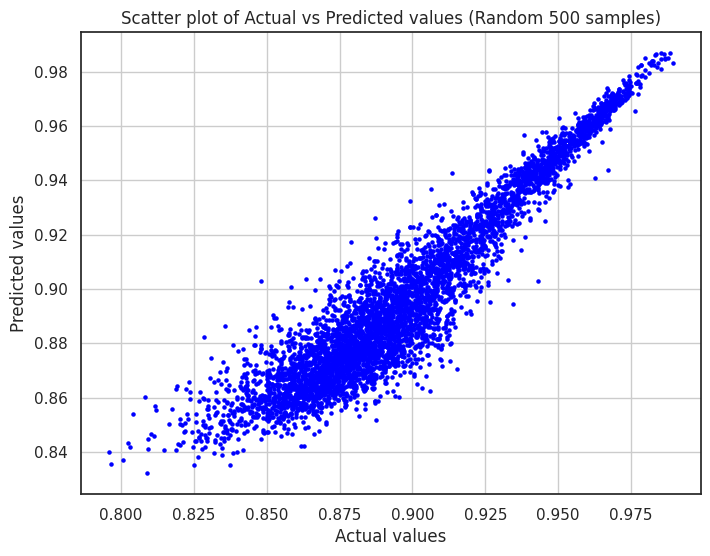

Mean Squared Error (MSE): 0.00013751220628973064
R-squared: 0.8871386948583248

Champ on test set 


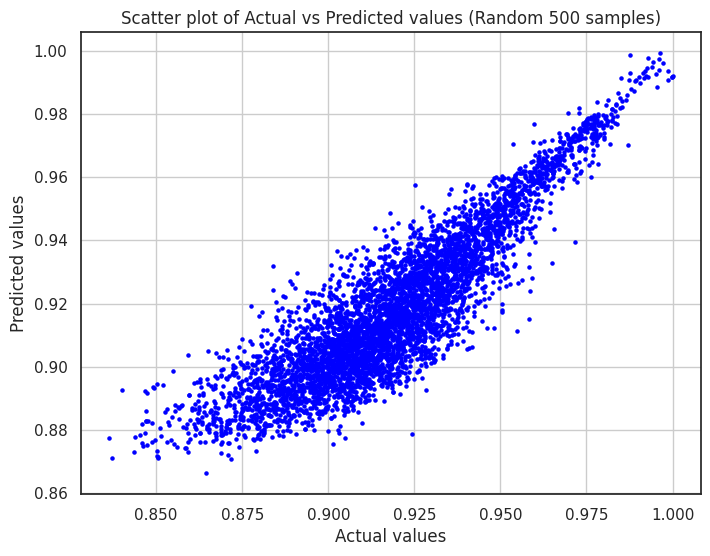

Mean Squared Error (MSE): 0.00014592811710238815
R-squared: 0.7945804142514332


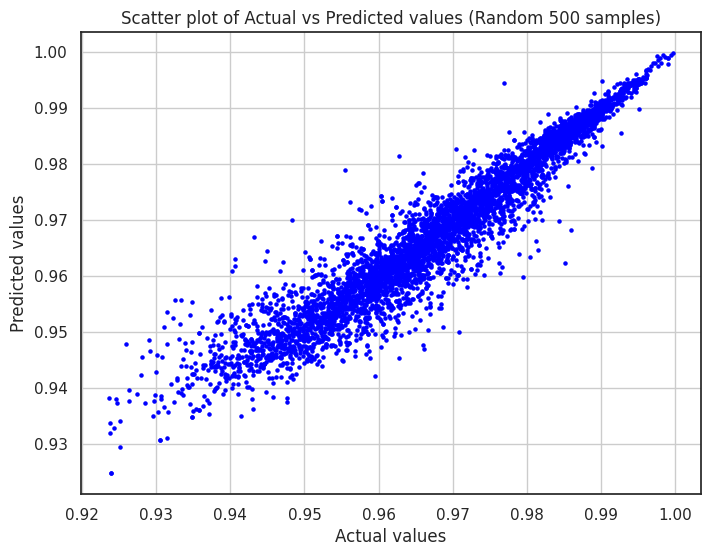

Mean Squared Error (MSE): 1.963894144583281e-05
R-squared: 0.9061730058067932


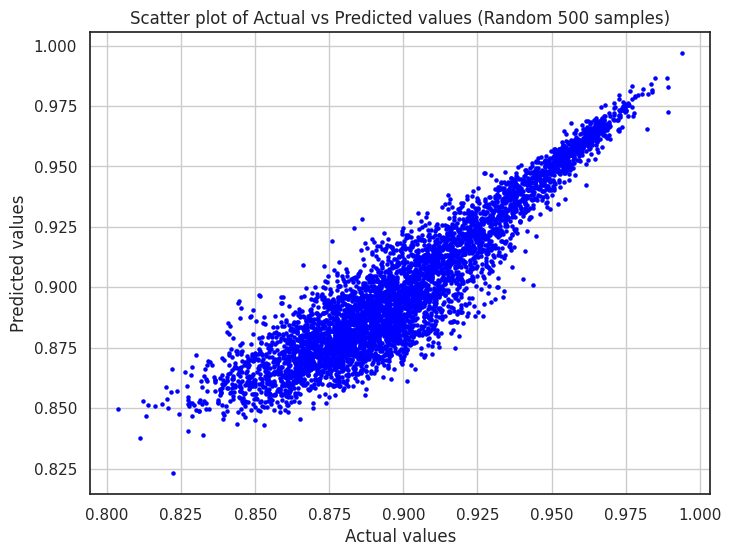

Mean Squared Error (MSE): 0.00015361106154477888
R-squared: 0.8541307202331496


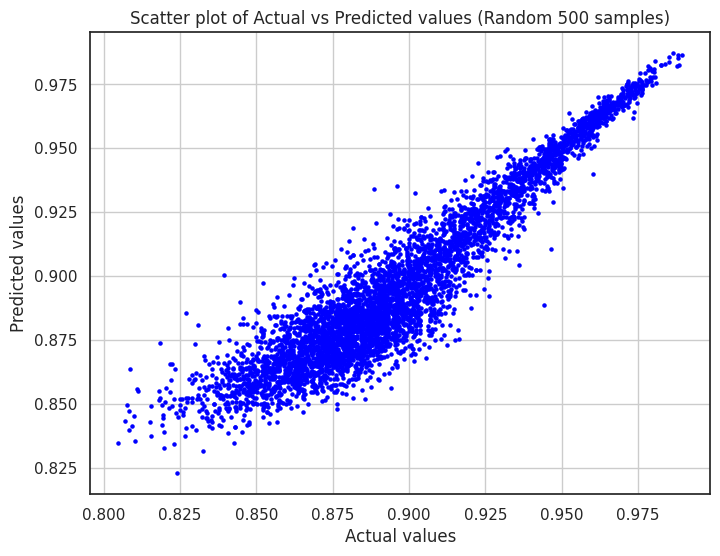

Mean Squared Error (MSE): 0.00013728196085921568
R-squared: 0.8851028176673619
Mean of four datasets MSE 0.00011411502023805388


In [ ]:
#making the same thing but for the 3 other datasets

df1 =  remove_outliers(df1)
df2 =  remove_outliers(df2)
df3 =  remove_outliers(df3)

df1_temp = df1.copy()
df1_temp = df1_temp.drop(df1_temp.index[-1])
#print(df_temp.columns.tolist())
new_index = df1.index[-1] + 1
df1.loc[new_index] = df1_temp.columns.tolist()


df2_temp = df2.copy()
df2_temp = df2_temp.drop(df2_temp.index[-1])
#print(df_temp.columns.tolist())
new_index = df2.index[-1] + 1
df2.loc[new_index] = df2_temp.columns.tolist()


df3_temp = df3.copy()
df3_temp = df3_temp.drop(df3_temp.index[-1])
#print(df_temp.columns.tolist())
new_index = df3.index[-1] + 1
df3.loc[new_index] = df3_temp.columns.tolist()

change_labels(df1)
change_labels(df2)
change_labels(df3)
df = data_normalization(df)
df_temp = data_normalization(df_temp)
df1 = data_normalization(df1)
df1_temp = data_normalization(df1_temp)
df2 = data_normalization(df2)
df2_temp = data_normalization(df2_temp)
df3 = data_normalization(df3)
df3_temp = data_normalization(df3_temp)
LinearRegresionModel(df1)
LassoModel(df1)
#RandomForestModel(df1)
RidgeModel(df1)
XGBoost(df_temp)
XGBoost(df1_temp)
XGBoost(df2_temp)
XGBoost(df3_temp)
print()
print("Champ on test set ")
mse =XGBoostChamp(df_temp)
mse1 =XGBoostChamp(df1_temp)
mse2 =XGBoostChamp(df2_temp)
mse3 =XGBoostChamp(df3_temp)
tab = [mse, mse1, mse2, mse3]

final_mse = 0
for mse_value in tab:
    final_mse += mse_value

print("Mean of four datasets MSE",final_mse / len(tab))












In [ ]:
#TODO- Testing on the test dataset. Currently test dataset is unused. I will do it ~Janek - I did it - Dawid

<function print>